In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Dataframes (Lesson)

In [2]:
# Path Creation
path=r'C:\Users\Drew\Instacart Basket Analysis'

In [3]:
# Import Data
ords_prods_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merge_derived_freq_grouping_agg,pkl'))

In [5]:
ords_prods_merge.shape

(32404859, 24)

In [6]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_average,type_of_spender,user_frequency,customer_frequency_type
0,33664,2 % Reduced Fat Milk,84,16,9.9,183964,873,3,0,10,...,Mid-range product,Busiest day,Busiest days,Most orders,8,New Customer,8.484091,Low Spender,10.0,Frequent Customer
1,33664,2 % Reduced Fat Milk,84,16,9.9,1851256,873,4,6,12,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New Customer,8.484091,Low Spender,10.0,Frequent Customer
2,33664,2 % Reduced Fat Milk,84,16,9.9,1915696,1893,1,5,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,6,New Customer,6.888525,Low Spender,13.0,Regular Customer
3,33664,2 % Reduced Fat Milk,84,16,9.9,2763293,1893,2,4,16,...,Mid-range product,Least busy,Slowest days,Most orders,6,New Customer,6.888525,Low Spender,13.0,Regular Customer
4,33664,2 % Reduced Fat Milk,84,16,9.9,2564805,1893,4,1,17,...,Mid-range product,Regularly busy,Busiest days,Average orders,6,New Customer,6.888525,Low Spender,13.0,Regular Customer


# Task 4.9 Part 2

## 2.Follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

## Creating Bar Chart
###  bar charts organize observations according to some category. That’s why bar charts are good for categorical data

<Axes: xlabel='orders_day_of_week'>

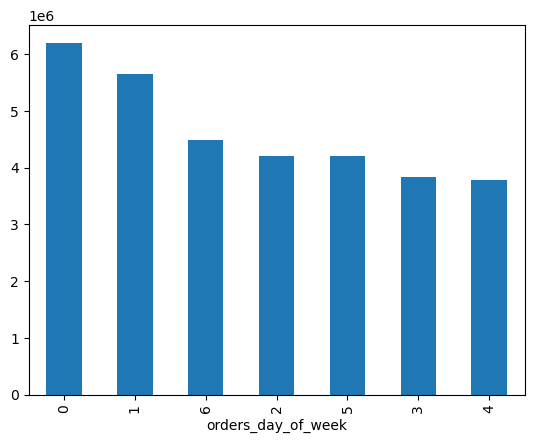

In [7]:
# Creating bar chart using orders_day_of_week'
# On the left, you have your basic indexing syntax (the name of the column between brackets attached to the name of the dataframe)
# after the dot comes the function you want to execute—in this case, value_counts(). 
# So far, the command is the same as it would be if you were printing the frequency of the column
# plot.bar(). This tells Python to find the bar() function within the plot module, and it’s what actually creates your bar chart. 
# Ensure to run the frequency of the column in question rather than directly on the column itself otherwise it will take a very long time to create chart.
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

## Sorting Bar Chart

<Axes: xlabel='orders_day_of_week'>

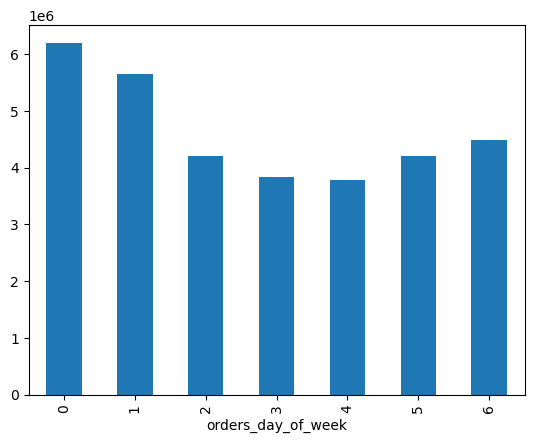

In [8]:
# Sorting bart chart
# sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

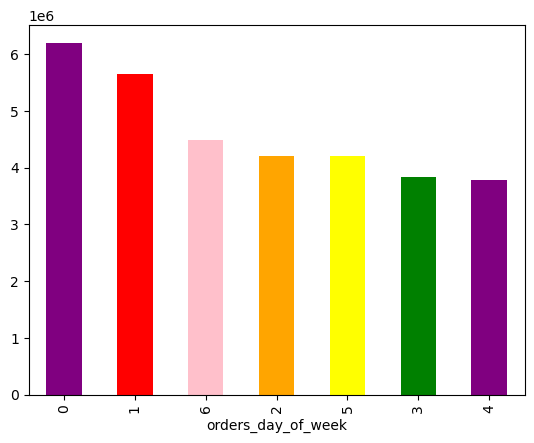

In [11]:
# Adding color to the bar chart
# include an indexed list of the colors you want for your bars as an argument in your function.
bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green'],)

## Creating Histograms

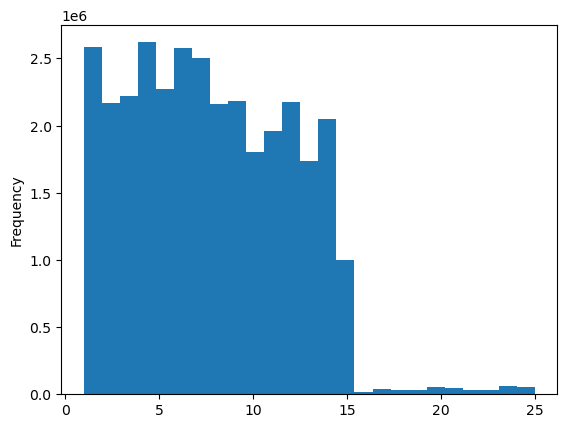

In [12]:
# an extra argument that needs to go within the parentheses. This is how you determine the granularity of the histogram
# smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars
hist=ords_prods_merge['prices'].plot.hist(bins=25)

In [13]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     7.790180e+00
std      4.242122e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

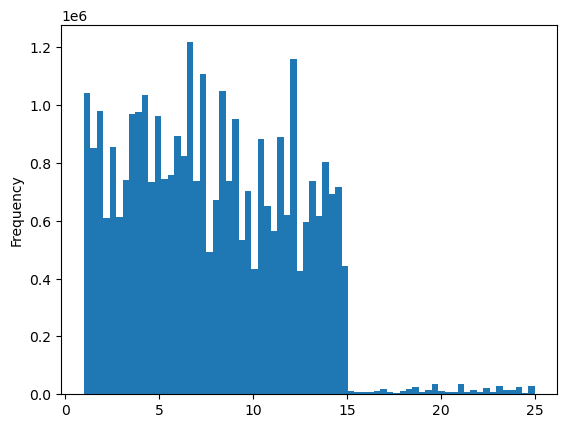

In [14]:
hist_2=ords_prods_merge['prices'].plot.hist(bins=70)

## Creating Scatterplot

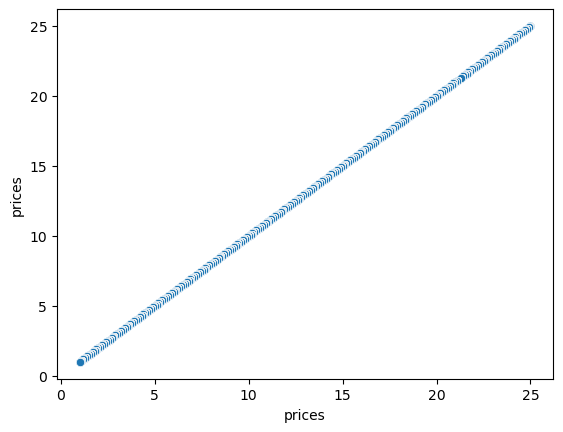

In [15]:
# creating scatterplot
# Scatterplots are created by way of the scatterplot() function, which is included in the seaborn library
# Within the parentheses, you include arguments in the form of axes. 
scatplot=sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
# Finding outlying prices over 100
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_average,type_of_spender,user_frequency,customer_frequency_type


In [17]:
# Removing outliers over 100, if any showed
# np.nan. This is a function from the NumPy library; it’s used to assign missing values
# np.nan tells python to change any value over 100 to a nan value.
ords_prods_merge.loc[ords_prods_merge['prices']>100,'prices']=np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

## Creating Line Charts

In [ ]:
line=sns.lineplot(data=ords_prods_merge,x='orders_day_of_week',y='prices')

### Sampling Data for line chart

In [ ]:
# first line of the command, you set the “seed.” 
# This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”)
# seed is set via the NumPy function random.seed()
# the second line of the command, you create a new list called dev. This will be what stores your boolean values for values less than or equal to 0.7
np.random.seed(4)
dev=np.random.rand(len(ords_prods_merge))<=0.7

In [ ]:
# Will take 70% of entire ords_prods_merge dataframe for sample size
big=ords_prods_merge[dev]

In [ ]:
# will take 30% of entire ords_prods_merge dataframe for smaple size
# tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.
small=ords_prods_merge[~dev]

In [ ]:
len(big)+len(small)

In [ ]:
ords_prods_merge_2=small[['orders_day_of_week','prices']]

In [ ]:
ords_prods_merge_3=big[['orders_day_of_week','prices']]

In [ ]:
line_2=sns.lineplot(data=ords_prods_merge_2,x='orders_day_of_week',y='prices')

In [ ]:
line_3=sns.lineplot(data=ords_prods_merge_3,x='orders_day_of_week',y='prices')

## Exporting Charts From Lesson

In [ ]:
# Using the saved bar object above
# chart has been saved within the bar object, and you’ll be able to access it any time you like by calling bar.figure
# to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function
# command accesses the figure within the bar object and applies the savefig() function to it
# Within the parentheses, you should see some familiar syntax—it’s pointing to a location on your computer in which to save your new file
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

In [ ]:
# Exporting histogram 1 25 bins
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices_25_bin.png'))

In [ ]:
# Exporting histogram 2 70 bins
hist_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_2_prices_70_bin.png'))

In [ ]:
# Exporting Scatterplot
scatplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatplot_prices.png'))

In [ ]:
# Export Line Graph Entire Dataframe
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_entire_df.png'))

In [ ]:
# Export line graph of 30% dataframe sample size of random generation
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_2_df_30_percent.png'))

In [ ]:
# Export line graph of 70% dataframe sample size of random generation
line_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_3_df_70_percent.png'))

# Task 4.9 (Questions 3-8)

## Import Data

In [ ]:
## Import Dataframe with Customers merge
ords_prods_cust_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merge.pkl'))

In [ ]:
ords_prods_cust_merge.shape

In [ ]:
# Ensuring import of dataframe
ords_prods_cust_merge.head()

## 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [ ]:
# Creating histogram for column 'order_hour_of_day' using 24 for bins as 24 hours in a day
hist_hod=ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins=24)

### From the above histogram, we can see the peak order timeframe. Peak orders revolve between 10AM to around 3pm. 
### Orders see a start in activity with increases starting at 6am and a start in declines after the 3pm peak (so we could say from 4pm).
### We can see the slow activity hours from midnight to 5AM and what appears to be after 8pm.
### Overview: Peak hours are from late morning to mid-afternoon with a decline in order frequency beginning in late afternoon and proceeding throughout the evening. The slowest order frequency is early morning until they begin to pick up around 6am.

## 4.Marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [ ]:
# Creating bar chart from loyalty_flag column
bar_loyalty_flag=ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color=['green','blue','red'])

## 5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [ ]:
# Creating seed for random sample 
np.random.seed(4)

In [ ]:
# Creating dev function for values less than or equal to 70% of entire dataframe for a 70/30 split.
dev=np.random.rand(len(ords_prods_cust_merge))<=0.7

In [ ]:
# Setting subset for 70% of entire ords_prods_cust_merge dataframe for sample size
big=ords_prods_cust_merge[dev]

In [ ]:
# Setting subset for 30% of entire ords_prods_cust_merge dataframe for sample size
small=ords_prods_cust_merge[~dev]

In [ ]:
len(big)+len(small)

In [ ]:
# Creating subset for only those needed columns before creating line chart for create 'small' sample size
prices_hod_line=small[['order_hour_of_day','prices']]

In [ ]:
# Creating second subset for only those needed columns before line chart for created 'big' sample size
prices_hod_line_2=big[['order_hour_of_day','prices']]

In [ ]:
# Creating line chart based on 'small' subset via prices_hod_line
prices_hod_line_30=sns.lineplot(data=prices_hod_line,x='order_hour_of_day',y='prices')

In [ ]:
prices_hod_line_70=sns.lineplot(data=prices_hod_line_2,x='order_hour_of_day',y='prices')

In [ ]:
line_whole=sns.lineplot(data=ords_prods_cust_merge,x='order_hour_of_day',y='prices')

## 6.Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. In a markdown cell beneath your line chart, describe what the line chart shows.

In [ ]:
# Creating subset for only those needed columns before creating line chart for create 'small' sample size
age_num_dependants=small[['age','num_of_dependants']]

In [ ]:
# Creating subset for only those needed columns before creating line chart for create 'big' sample size
age_num_dependants_2=big[['age','num_of_dependants']]

In [ ]:
age_dependants_line_30=sns.lineplot(data=age_num_dependants,x='age',y='num_of_dependants')

In [ ]:
age_dependants_line_70=sns.lineplot(data=age_num_dependants_2,x='age',y='num_of_dependants')

In [ ]:
age_dependants_line_whole=sns.lineplot(data=ords_prods_cust_merge,x='age',y='num_of_dependants')

### The above graphs show a high variable relationship between age and number of dependants and graps have large fluctuations throughout.
### Because of the constant fluctuating trends, there is no clear trend between age and number of dependants.
### There are occasional spikes in around early 20s, early 60s, and late 60s.
### On the opposite, there are several decreasing spikes around mid 20s, late 50s, around mid 60s, and late 70s.
### Reasons for the variability could be researched to see if demographics or socio-economic factors contribute to these spikes.
### Further investigation could see if spikes in younger and older age ranges are a result due to young children or elderly dependants for certain households.

## 7.Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.  

In [ ]:
# Creating scatterplot between age and income
age_income_scatterplot=sns.scatterplot(x='age',y='income',data=ords_prods_cust_merge)

### The scatterplot does not appear to show any clear linear relationship between age and income as the data points are quite spread  without any real consistency towards clear increasing or decreasing patterns.
### We can see that after the age of 40, incomes are beginning to see an increase for certain customers compared to those between the ages of 20 to 40.
### Due to the higher income found for certain customers over the age of 40, the incomes for the age group groups over 40 do appear to have a greater distribution for incomes over 400000. 
### We can see that the incomes equal to or less than 200000 are must more dense than those over 200000 which appear to be more sparsely distributed and scattered than lower incomes.  
### Summary: The scatterplot shows a varying range of income amongst customer ages with a higher concentration of density of incomes equal to or less than 200000. There is no clear linear relationship between age and income so income can be said to be variable amongst the ages. Finally, higher income(over 200000) is less dense and more spread out than lower income with some customers after the age of 40 showing to have the highest and most spread income over 400000.

## Export Visualizations

In [ ]:
# Exporting Histogram
hist_hod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_order_hour_of_day.png'))

In [ ]:
# Exporting Loyalty Flag Bar Chart 
bar_loyalty_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_flag.png'))

In [ ]:
# Exporting Line Chart for small subset of 30% Dataframe for prices by order_hour_of_day chart
prices_hod_line_30.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_hod_line_30.png'))

In [ ]:
# Exporting Line Chart for big subset of 70% Dataframe for prices by order_hour_of_day chart
prices_hod_line_70.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_hod_line_70.png'))

In [ ]:
# Exporting Line Chart for whole Dataframe for prices by order_hour_of_day chart
line_whole.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_hod_line_whole.png'))

In [ ]:
# Exporting Line Chart for small subset of 30% Dataframe for age by num_of_dependants chart
age_dependants_line_30.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependants_line_30.png'))

In [ ]:
# Exporting Line Chart for big subset of 70% Dataframe for age by num_of_dependants chart
age_dependants_line_70.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependants_line_70.png'))

In [ ]:
# Exporting Line Chart of whole Dataframe for age by num_of_dependants chart
age_dependants_line_whole.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependants_line_whole.png'))

In [ ]:
# Exporting scatterplot of age and income of whole dataframe
age_income_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_scatterplot_whole.png'))